
    [ ] Choose your target. Which column in your tabular dataset will you predict?
    [ ] Is your problem regression or classification?
    [ ] How is your target distributed?
        Classification: How many classes? Are the classes imbalanced?
        Regression: Is the target right-skewed? If so, you may want to log transform the target.
    [ ] Choose which observations you will use to train, validate, and test your model.
        Are some observations outliers? Will you exclude them?
        Will you do a random split or a time-based split?
    [ ] Choose your evaluation metric(s).
        Classification: Is your majority class frequency > 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    [ ] Begin to clean and explore your data.
    [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?


In [14]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\SKrishna\\Documents\\GitHub\\airbnb'

In [ ]:
pd.set_options('display')

In [11]:
listings = pd.read_csv('listings_1.csv', low_memory=False,parse_dates=['last_scraped', 'first_review', 'last_review', 'host_since'])

In [12]:
listings.shape

(9023, 106)

In [13]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20191121092259,2019-11-21,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, (Phone number h...","This beautiful, gracious home has been complet...","Gorgeous, architect remodeled, (Phone number h...",none,Madrona is a hidden gem of a neighborhood. It ...,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.21
1,5682,https://www.airbnb.com/rooms/5682,20191121092259,2019-11-21,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,3.92
2,6606,https://www.airbnb.com/rooms/6606,20191121092259,2019-11-21,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","Soo centrally located, this is a little house ...","This tiny cottage is only 15x10, but it has ev...",none,"A peaceful yet highly accessible neighborhood,...",...,f,f,strict_14_with_grace_period,f,f,3,3,0,0,1.19
3,9419,https://www.airbnb.com/rooms/9419,20191121092259,2019-11-21,Glorious sun room w/ memory foambed,This beautiful double room features a magical ...,Our new Sunny space has a private room from th...,This beautiful double room features a magical ...,none,"Lots of restaurants (see our guide book) bars,...",...,f,f,moderate,t,t,8,0,8,0,1.29
4,9460,https://www.airbnb.com/rooms/9460,20191121092259,2019-11-21,Downtown Convention Center B&B -- Free Minibar,Take up a glass of wine and unwind on one of t...,Greetings from Seattle. Thanks for considering...,Take up a glass of wine and unwind on one of t...,none,The apartment is situated where Downtown meets...,...,t,f,moderate,f,f,4,3,1,0,3.65


In [28]:
#since we are not planning to use most of the textual data, i've filtered out the list of columns that are useful as a list cols.

In [17]:
cols = ['id', 'host_id', 'host_since', 'host_verifications', 'host_is_superhost', 'zipcode', 'bathrooms', 'bedrooms', 
        'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 
        'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights','maximum_nights', 'calendar_updated', 
        'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
        'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating','review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
        'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 
        'require_guest_phone_verification','calculated_host_listings_count', 'reviews_per_month']

In [20]:
df = listings[cols]

In [21]:
df.dtypes

id                                           int64
host_id                                      int64
host_since                          datetime64[ns]
host_verifications                          object
host_is_superhost                           object
zipcode                                     object
bathrooms                                  float64
bedrooms                                   float64
beds                                       float64
bed_type                                    object
amenities                                   object
square_feet                                float64
price                                       object
weekly_price                                object
monthly_price                               object
security_deposit                            object
cleaning_fee                                object
guests_included                              int64
extra_people                                object
minimum_nights                 

In [27]:
#lets see the number of null values here

In [29]:
df.isnull().sum()

id                                     0
host_id                                0
host_since                             4
host_verifications                     0
host_is_superhost                      4
zipcode                              169
bathrooms                              2
bedrooms                               7
beds                                   3
bed_type                               0
amenities                              0
square_feet                         8620
price                                  0
weekly_price                        8044
monthly_price                       8272
security_deposit                    1541
cleaning_fee                         769
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
calendar_updated                       0
has_availability                       0
availability_30                        0
availability_60 

In [23]:
df['price'] = df['price'].str.replace('$','')

In [25]:
df['price'].max()

'999.00'

In [26]:
df['price'].describe()

count       9023
unique       400
top       100.00
freq         333
Name: price, dtype: object

(array([247., 690., 253., 309., 162., 575., 559., 335., 547., 246., 353.,
         41., 493.,  96., 159., 132.,  58., 139., 298.,  71.,  79., 154.,
        154., 169., 267.,  29.,  88., 119.,  65.,  94.,  37.,  62., 129.,
         36., 129.,  45.,  44.,  23.,  83.,  34.,  55.,  26.,  89.,  23.,
         61.,  43.,  29.,  33.,  23.,  33.,  16.,  66.,  44.,  35.,  24.,
         60.,  30.,  48., 118.,  27.,  13.,  26.,  21.,  12.,   7.,  29.,
         18.,  12.,  21.,   6.,  20.,  20.,  14.,   9.,  96.,   5.,   6.,
         15.,   6.,   6.,   8.,  13.,  25.,   5.,   8.,   7.,   6.,  15.,
          8.,   4.,   5.,   9.,   5.,   5.,   6.,   5.,   4.,   4.,  29.,
          4.]),
 array([  0.  ,   3.99,   7.98,  11.97,  15.96,  19.95,  23.94,  27.93,
         31.92,  35.91,  39.9 ,  43.89,  47.88,  51.87,  55.86,  59.85,
         63.84,  67.83,  71.82,  75.81,  79.8 ,  83.79,  87.78,  91.77,
         95.76,  99.75, 103.74, 107.73, 111.72, 115.71, 119.7 , 123.69,
        127.68, 131.67, 135.66

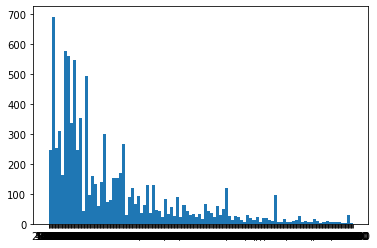

In [31]:
plt.hist(df['price'], bins=100)